# New Apprentice Python Project 
**Using the appleAppData data set found on Kaggle! https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps** 

```python
Business Questions :
1. What is the average rating of the FREE and NON-FREE apps
2. What are the average ratings of common genres (gaming, business, navigation, etc)?
3. What is the average, minimum and max price of specified genres?
```


##### Importing Libraries, opening the dataset and cleaning it


In [65]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('appleAppData.csv')
df_main = df.dropna() # Drops all NaN values
df_main = df_main[['Primary_Genre', 'Price', 'Free', 'Average_User_Rating']] # Dropping all but the columns im using in this project

Showing the dataset information and displaying a small table of the data

In [79]:
# Displaying dataset information
df_main.info()

# Showing a small table of some of the data I will be analyzing
df_table = df_main[['Primary_Genre', 'Average_User_Rating', 'Free', 'Price']]
df_table.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585721 entries, 4 to 1230374
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Primary_Genre        585721 non-null  object 
 1   Price                585721 non-null  float64
 2   Free                 585721 non-null  bool   
 3   Average_User_Rating  585721 non-null  float64
dtypes: bool(1), float64(2), object(1)
memory usage: 18.4+ MB


,Primary_Genre,Average_User_Rating,Free,Price
4,Reference,0.00000,True,0.00
7,Book,0.00000,True,0.00
9,News,0.00000,True,0.00
11,Book,4.78902,True,0.00
13,Book,3.09524,False,0.99
14,Book,3.88333,False,4.99
15,Book,4.13253,False,4.99
18,Book,3.00000,True,0.00
21,Games,5.00000,True,0.00
23,Games,0.00000,False,0.99


# Creating a function to find the average of free and paid apps!

Defining the app_ratings function. This function will itterate through the data and add rating values to the free_apps and paid_apps list if they are free or paid

In [66]:
def app_ratings():
    global free_apps, paid_apps
    free_apps = []
    paid_apps = []

    for index, row in df_main.iterrows():
        if row[3] > 0:
            rating = row[3] 
            free_checker = row[2] # Set a variable to hold the value of the free column from the dataset
            if free_checker == True:
                free_apps.append(rating) # Adds the rating value to the free apps list only the free_checker returns True
            else: 
                paid_apps.append(rating) # Adds the rating value to the paid apps list if free_checker returns False

Here I create a function to make finding the average of lists easier. I also call my function and display a graph using the information found


[Text(0, 0, '4.124'), Text(0, 0, '3.8252')]

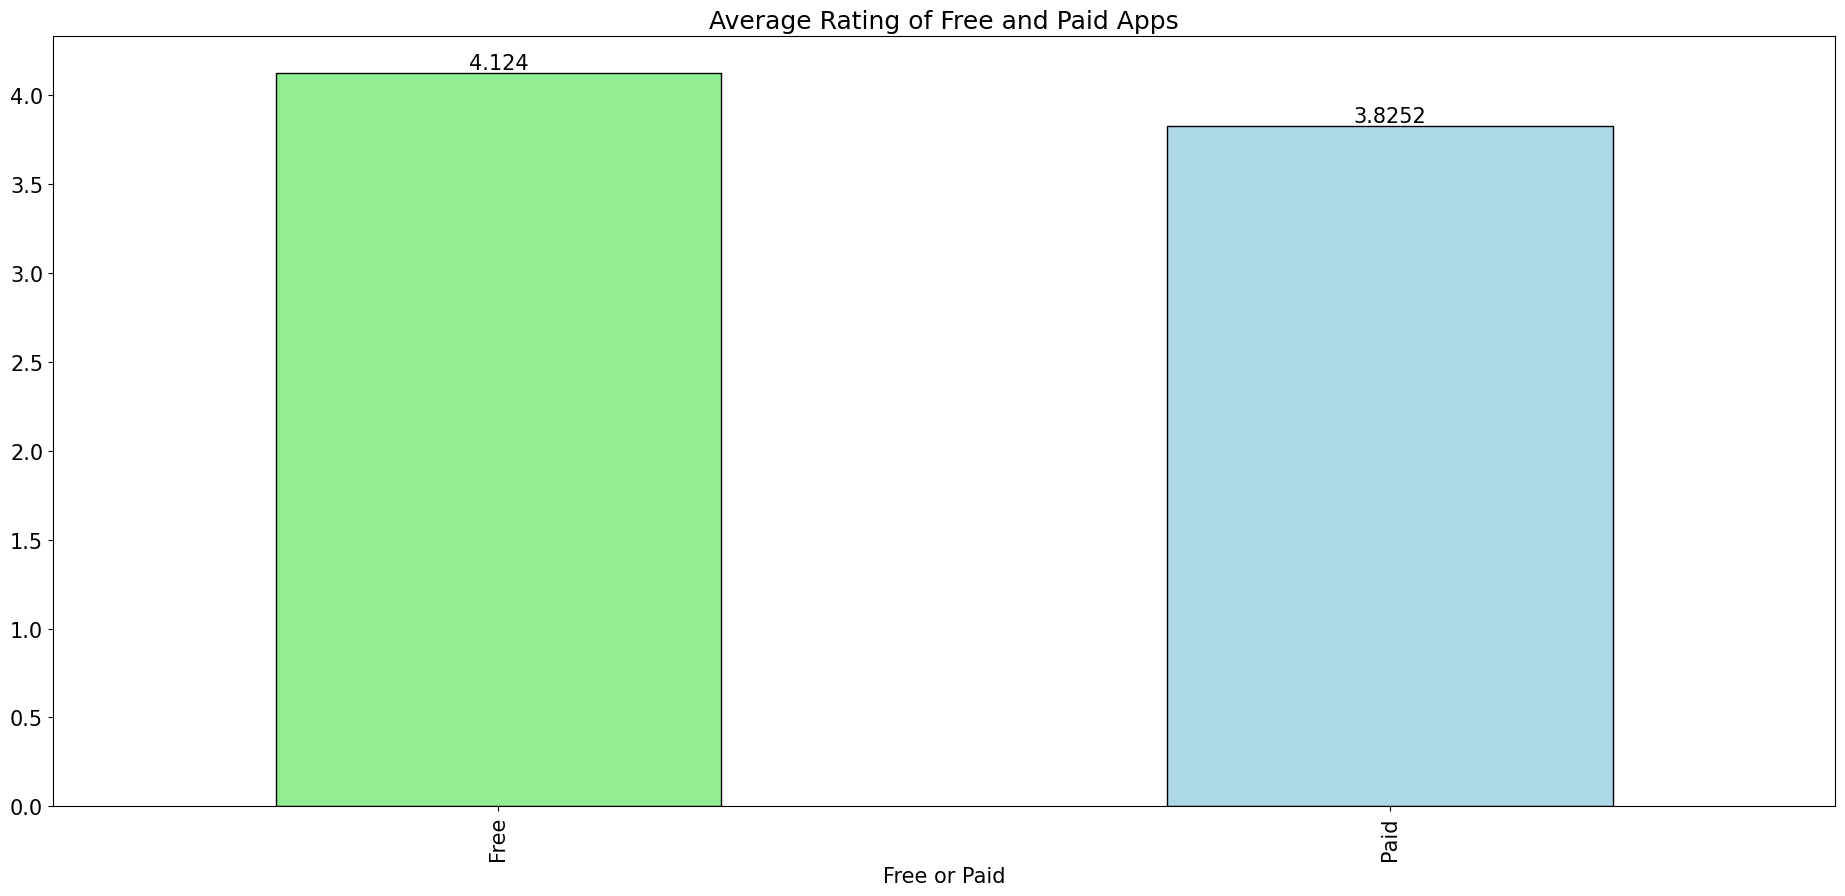

In [67]:
           
# Create a function thats accepts a list and returns the average value of that list 
def average_for_lists(list):
    average = round(sum(list) / len(list), 4)
    return average

# Calling my loop function to find the ratings from free and paid apps
app_ratings() ##Calling my loop function to find the ratings from free and paid apps

# Create a dictionary to hold the found data
free_paid_graph_dict = {'Free or Paid': ['Free', 'Paid'],
                    'Average Rating':[average_for_lists(free_apps), average_for_lists(paid_apps)]}

# Turning that dictionary into a dataframe to later graph
free_paid_df = pd.DataFrame(free_paid_graph_dict)

# Graphing the dataframe
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15
free_paid_graph = free_paid_df.plot(figsize = (23, 10),
            color = ['lightgreen', 'lightblue'],
            kind = 'bar',
            legend = False,
            x = 'Free or Paid',
            y = 'Average Rating',
            title = 'Average Rating of Free and Paid Apps',
            edgecolor = 'black')
free_paid_graph.bar_label(free_paid_graph.containers[0]) #shows the value of the bars

# Finding the average rating of user defined genres

Create a function to take 3 genres and return the ratings in a list

In [69]:
def genre_ratings(g1, g2, g3):
    # Set these as global variables because I use them later in a different cell
    global genre1_list, genre2_list, genre3_list, inp1, inp2, inp3 

    # Saving function parameters as user inputs to use in graph
    inp1 = g1
    inp2 = g2
    inp3 = g3

    # Create genre lists to hold the ratings of specified genres
    genre1_list = []
    genre2_list = []
    genre3_list = []

    # itterate over the rows and check for if the primary genre has a value of the user inputed value and adding that rating to the designated list
    for index, row in df_main.iterrows():
        rating = row[3]
        genre_checker = row[0]
        if genre_checker == g1 and row[3] > 0.0:
            genre1_list.append(rating)
        elif genre_checker == g2 and row[3] > 0.0:
            genre2_list.append(rating)
        elif genre_checker == g3 and row[3] > 0.0:
            genre3_list.append(rating)

In [62]:
# Display all the genres found in the dataset
df_main.Primary_Genre.unique()

array(['Reference', 'Book', 'News', 'Games', 'Lifestyle', 'Education',
       'Medical', 'Food & Drink', 'Shopping', 'Productivity',
       'Entertainment', 'Photo & Video', 'Travel', 'Business',
       'Social Networking', 'Music', 'Utilities', 'Health & Fitness',
       'Magazines & Newspapers', 'Stickers', 'Sports', 'Navigation',
       'Finance', 'Graphics & Design', 'Weather', 'Developer Tools'],
      dtype=object)

Using the created function 'genre_ratings' to itterate through 3 genres and displaying a graph with the average ratings of those genres

[Text(0, 0, '4.1385'), Text(0, 0, '3.967'), Text(0, 0, '3.8129')]

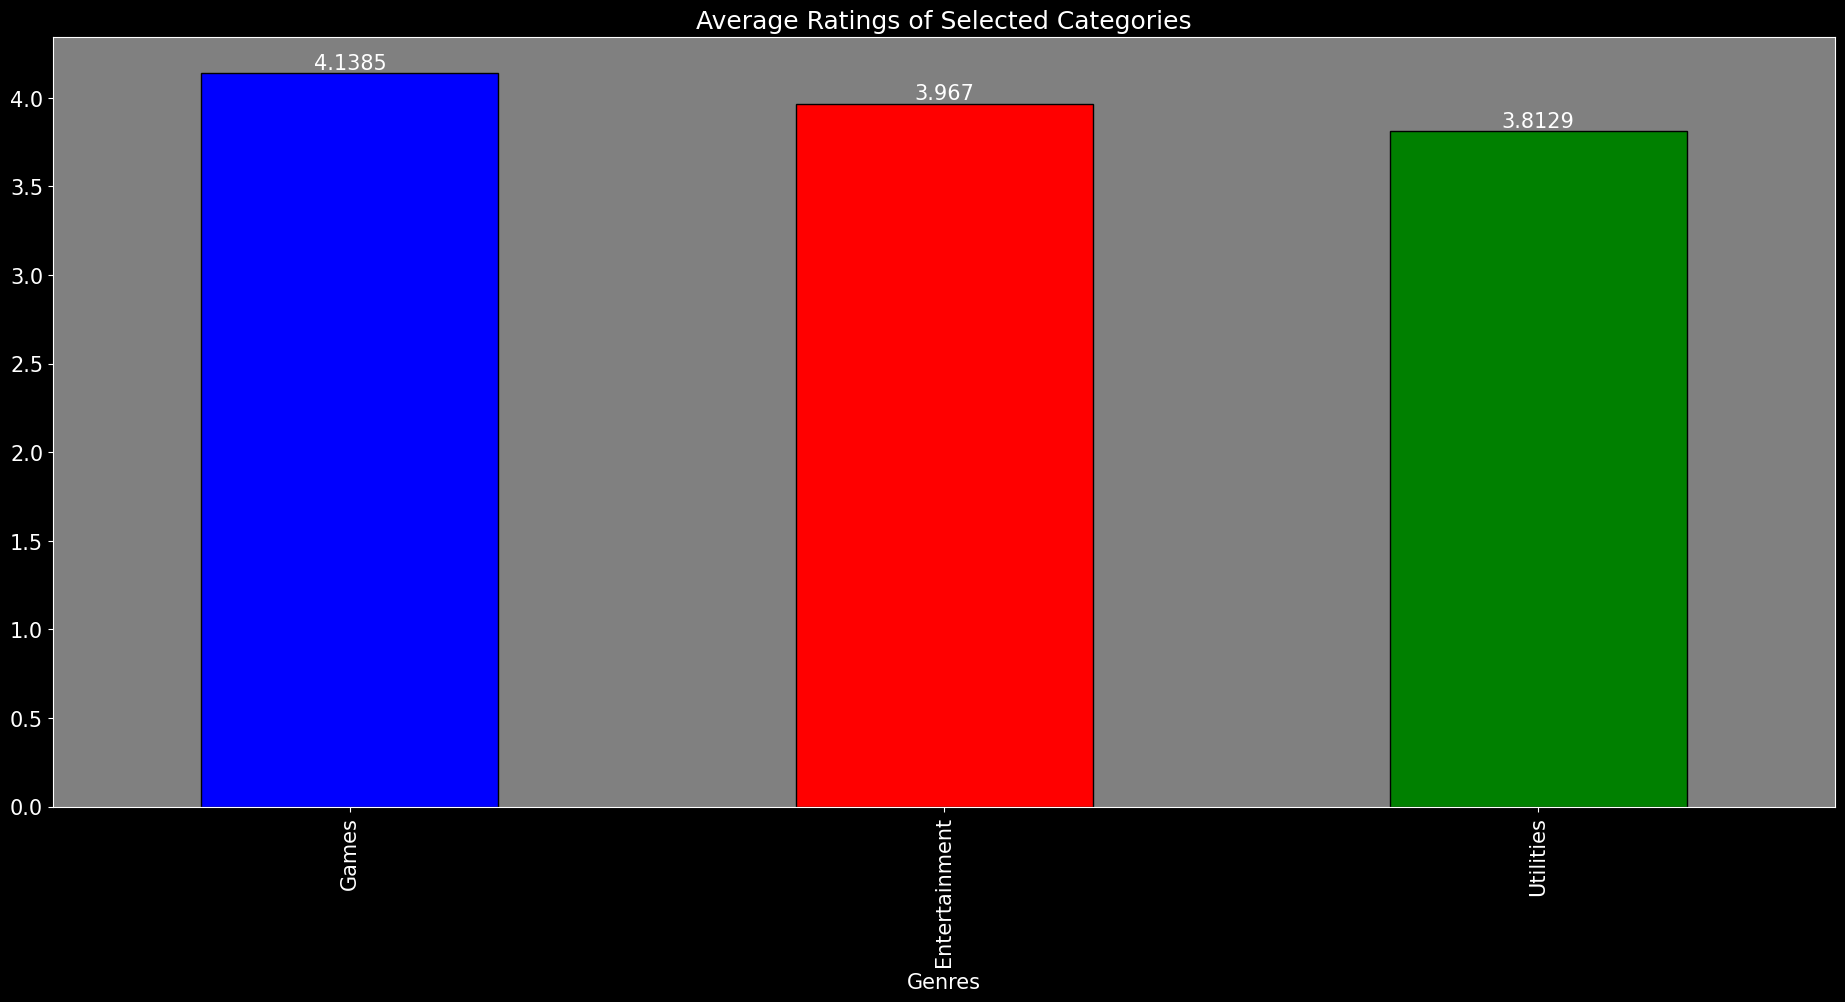

In [80]:
# Call my funciton with 3 genres (you can put any genre thats in the data set)
genre_ratings('Games', 'Entertainment', 'Utilities')

# Putting the data found in the function into dictionary
genre_dic = {'Genres': [inp1, inp2, inp3],
                'Average Ratings':[average_for_lists(genre1_list), average_for_lists(genre2_list), average_for_lists(genre3_list)]}
                  
# Creating a dataframe from the dictionary
genre_df = pd.DataFrame(genre_dic)
# Styling the graph a little
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15

# Creates a bar graph using the information from the DataFrame
genre_graph = genre_df.plot(figsize = (23, 10), 
            kind = 'bar',
            title = 'Average Ratings of Selected Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Ratings',
            color = ['blue', 'red', 'green'],
            edgecolor = 'black')
genre_graph.set_facecolor('gray')
genre_graph.bar_label(genre_graph.containers[0])# Graph labels to display the actual average of the genre

# Create a function that returns the min, max and average price of a specified genre

In [70]:
# Create a function that takes a genre type as a parameter and places pricing values into a list
def genre_pricing(genre):
    global inp1
    inp1 = genre
    genre_list = []

    for index, row in df_main.iterrows():
        genre_checker = row[0]
        price = row[1]
        if genre_checker == genre and price > 0:
            genre_list.append(price)    
            
    # Create global variable in the function that hold min, max and avg price
    global genre_min_price, genre_max_price, genre_avg
    genre_min_price = min(genre_list)
    genre_max_price = max(genre_list)
    genre_avg = sum(genre_list) / len(genre_list)

    

##### Calling the function and creating a horizontal graph to display the average, max and minimum price of a specified genre

[Text(3, 0, '$0.99'), Text(3, 0, '$174.99'), Text(3, 0, '$3.79')]

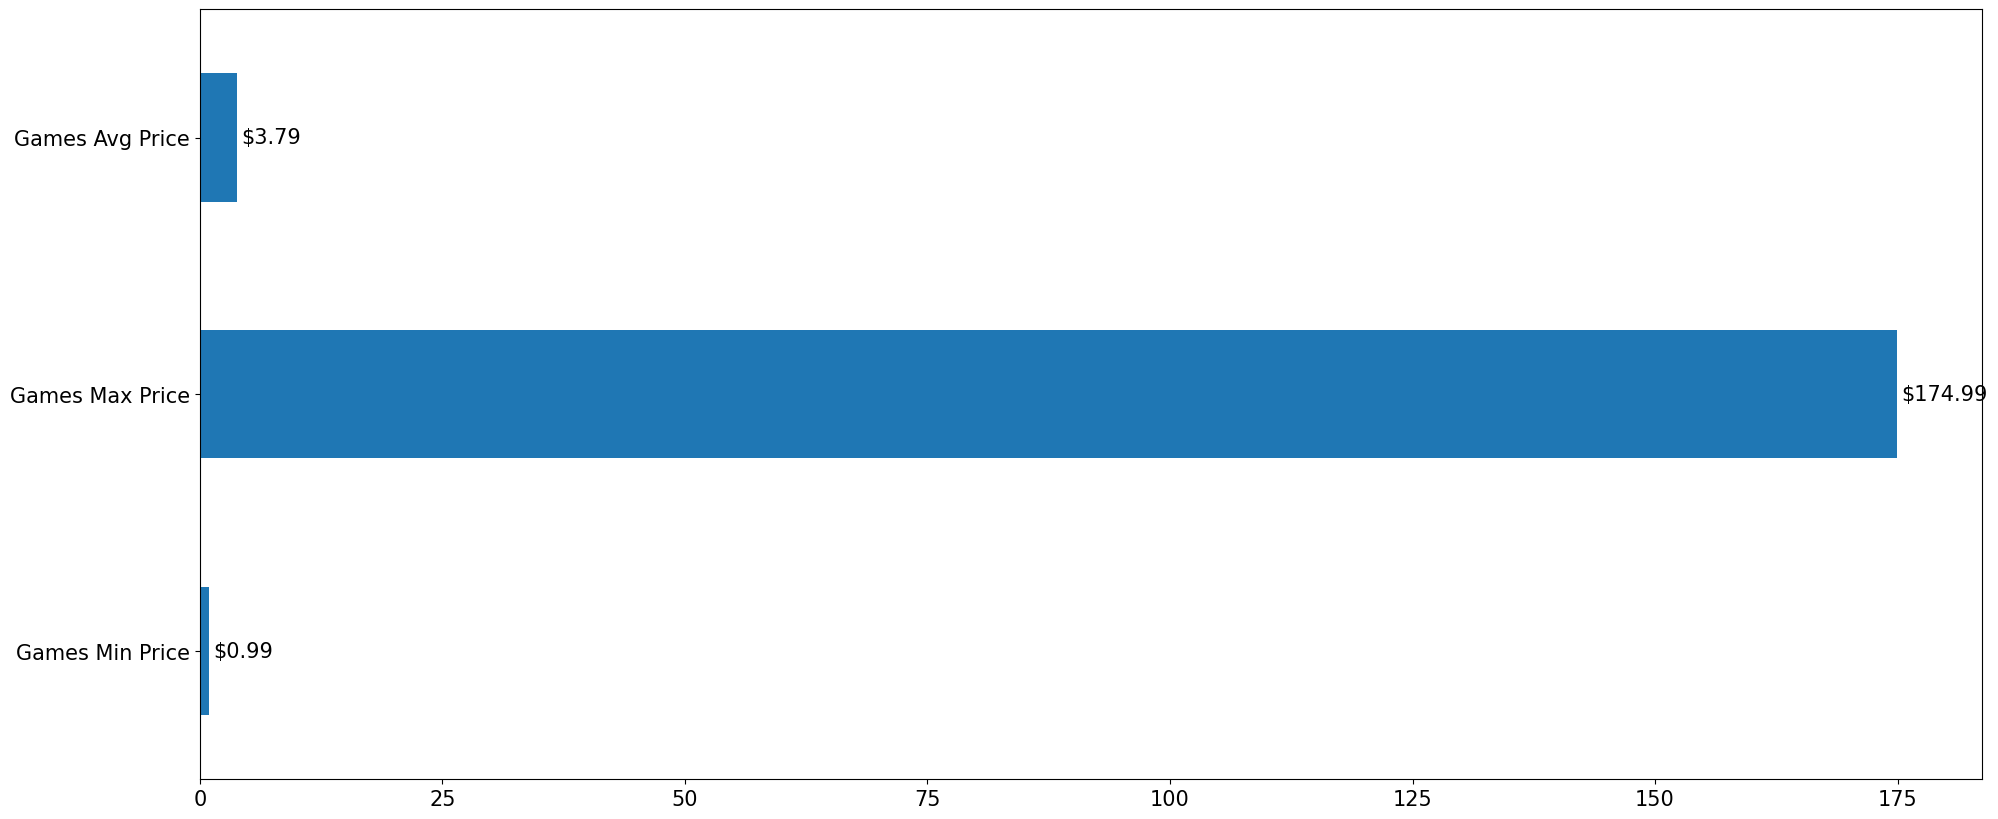

In [81]:
# Calling my function
genre_pricing('Games')
# Creating a dictionary to hold the data found in the function
genre_pricing_dict = {'Genre': [inp1 + ' Min Price', inp1 + ' Max Price', inp1 + ' Avg Price'],
                        'Pricing Values':[genre_min_price, genre_max_price, genre_avg]}
                        
# Putting the dictionary into a datafram
pricing_df = pd.DataFrame(genre_pricing_dict)
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15

# Creating a graph from the dataframe
pricing_graph = pricing_df.plot.barh(x = 'Genre', y = 'Pricing Values', figsize = (23, 10), legend = False)
pricing_graph.yaxis.set_label_text("") # Remove the y label(genre) from the graph
pricing_graph.bar_label(pricing_graph.containers[0], fmt = '$%.2f', color = 'black', padding = 3) # Display the values next to the bars and formatting them to dislay $ 


